In [1]:
import pandas as pd

# アメリカの赤ちゃんに名付けられた名前のデータセット
# 名前と、性別と、名前出現数
names1880 = pd.read_csv('names/yob1880.txt', names=['name', 'sex', 'births'])
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [2]:
# 男女別に集計し名前の数を合計する
names1880.groupby('sex').births.sum()

sex
F     90992
M    110491
Name: births, dtype: int64

In [3]:
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path = 'names/yob{}.txt'.format(year)
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)
# データフレームの配列をconcatでつなぐ
# ignore_index: インデックスを連結対象から外してインデックスを作りなおす
names = pd.concat(pieces, ignore_index=True)
names.tail()

,name,sex,births,year
1691891,Zymaire,M,5,2010
1691892,Zyonne,M,5,2010
1691893,Zyquarius,M,5,2010
1691894,Zyran,M,5,2010
1691895,Zzyzx,M,5,2010


In [4]:
# インデックスに年度を指定し、カラムに性別を指定する、インデックスが同じものは合計してやる
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1899166,2053065
2007,1920231,2072975
2008,1888177,2037309
2009,1834048,1980491
2010,1774186,1915331


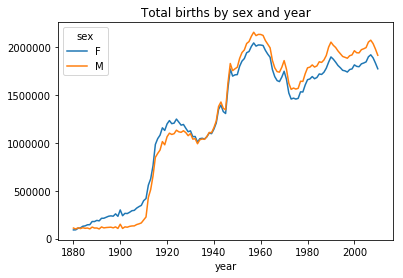

In [5]:
# データフレームをプロットする
# インデックスがx軸になる
%matplotlib inline
total_births.plot(title='Total births by sex and year')

In [6]:
# 年度別・性別に集計して名前の割合(prop)を調べる
def add_prop(group):
    # 同一の年度と性別のデータフレームが流れてくる
    births = group.births
    group['prop'] = births / births.sum()
    return group

# apply: 引数に渡された関数を実行する。デフォルトでは各列に対して適用され、引数axis=1とすると各行に対して適用される。
# groupbyの引数を配列で複数渡すと、グループがネストされる。この場合はyearがグルーピングされた中で、さらにsexがグルーピングされている
names = names.groupby(['year', 'sex']).apply(add_prop)
names.tail()

,name,sex,births,year,prop
1691891,Zymaire,M,5,2010,0.000003
1691892,Zyonne,M,5,2010,0.000003
1691893,Zyquarius,M,5,2010,0.000003
1691894,Zyran,M,5,2010,0.000003
1691895,Zzyzx,M,5,2010,0.000003


In [7]:
# propを年度別・性別に合計してちゃんと1になるか調べる
import numpy as np
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [8]:
# 年度別、性別で名前数が上位1000件のレコードを抽出
def get_top1000(group):
    return group.sort_values(by='births', ascending=False).head(1000)

# 年度、性別でグルーピング
grouped = names.groupby(['year', 'sex'])
# グループの中を年度で
top1000 = grouped.apply(get_top1000)
# groupbyした後に集計処理メソッドを実行してないので、reset_indexでgroupbyを戻す
top1000.reset_index(inplace=True, drop=True)
top1000.tail()

,name,sex,births,year,prop
261872,Simeon,M,196,2010,0.000102
261873,Reuben,M,196,2010,0.000102
261874,Keshawn,M,196,2010,0.000102
261875,Eliezer,M,196,2010,0.000102
261876,Enoch,M,196,2010,0.000102


In [9]:
boys = top1000[top1000.sex == 'M']
boys.tail()

,name,sex,births,year,prop
261872,Simeon,M,196,2010,0.000102
261873,Reuben,M,196,2010,0.000102
261874,Keshawn,M,196,2010,0.000102
261875,Eliezer,M,196,2010,0.000102
261876,Enoch,M,196,2010,0.000102


In [10]:
girls = top1000[top1000.sex == 'F']
girls.tail()

,name,sex,births,year,prop
260872,Savanah,F,252,2010,0.000142
260873,Aleigha,F,252,2010,0.000142
260874,Alaysia,F,252,2010,0.000142
260875,Dania,F,251,2010,0.000141
260876,Karley,F,251,2010,0.000141


In [11]:
# 年度をインデックスにし、名前をカラムにする
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)
total_births.head()

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fabe2a987f0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fabd823d160>], dtype=object)

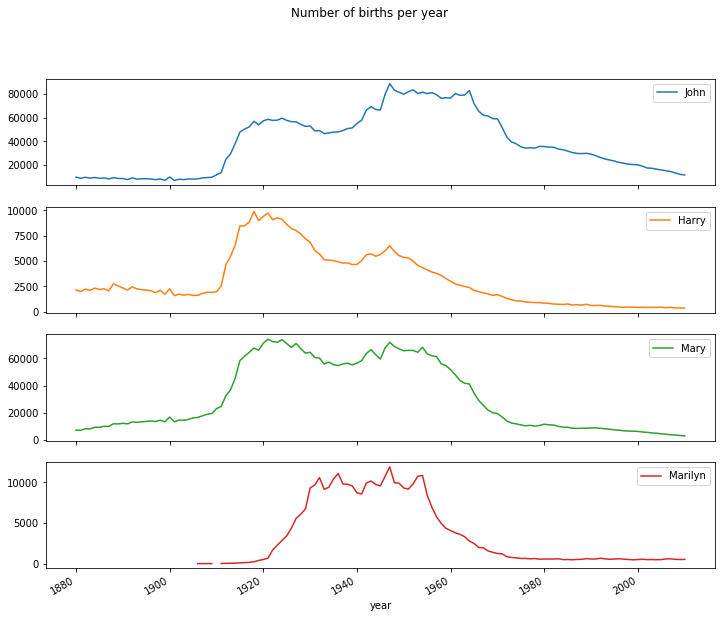

In [12]:
# いわゆる一般的な名前をプロットしてみる
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False, title='Number of births per year')

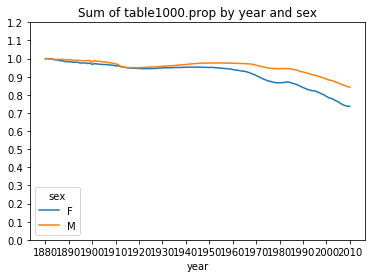

In [13]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [14]:
df = boys[boys.year == 2010]
df.tail()

,name,sex,births,year,prop
261872,Simeon,M,196,2010,0.000102
261873,Reuben,M,196,2010,0.000102
261874,Keshawn,M,196,2010,0.000102
261875,Eliezer,M,196,2010,0.000102
261876,Enoch,M,196,2010,0.000102


In [15]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum.head(10)

260877    0.011544
260878    0.020939
260879    0.029990
260880    0.038951
260881    0.047849
260882    0.056593
260883    0.065178
260884    0.073441
260885    0.081550
260886    0.089633
Name: prop, dtype: float64

In [16]:
prop_cumsum.values.searchsorted(0.5)

116

In [17]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

25

In [18]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


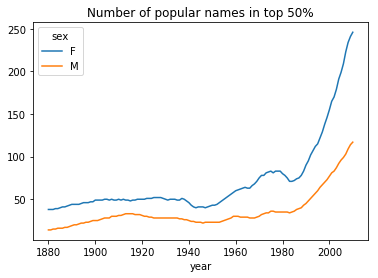

In [19]:
diversity.plot(title='Number of popular names in top 50%')

In [20]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
last_letters.head()

0    y
1    a
2    a
3    h
4    e
Name: last_letter, dtype: object

In [21]:
table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108397.0  691272.0  676436.0    977.0    5211.0   28846.0
b                 NaN     694.0     455.0    411.0    3912.0   39252.0
c                 5.0      49.0     955.0    482.0   15463.0   23332.0
d              6751.0    3729.0    2639.0  22113.0  262170.0   44795.0
e            133601.0  435062.0  316555.0  28665.0  178809.0  130187.0

In [22]:
subtable.sum()

sex  year
F    1910     396502.0
     1960    2022104.0
     2010    1774186.0
M    1910     194215.0
     1960    2132705.0
     2010    1915331.0
dtype: float64

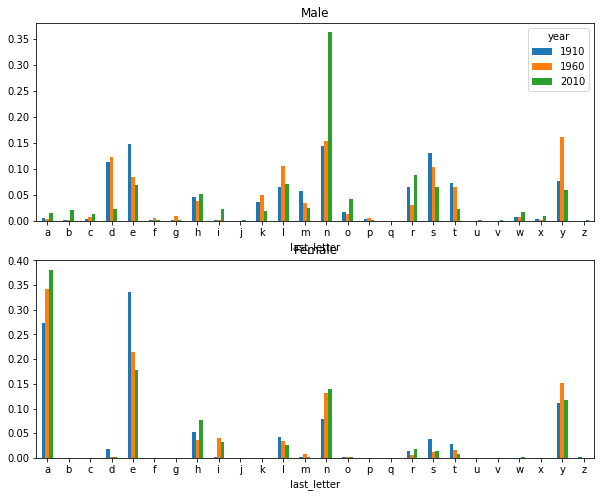

In [23]:
import matplotlib.pyplot as plt


letter_prop = subtable / subtable.sum()
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

In [24]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153216,0.075762
1881,0.083242,0.153212,0.077455
1882,0.085332,0.149561,0.077538
1883,0.084051,0.151653,0.079148
1884,0.086121,0.149926,0.080407


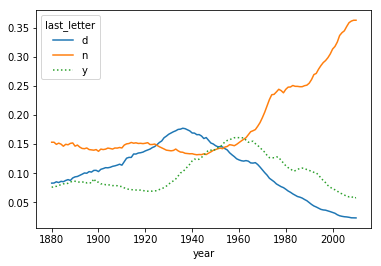

In [25]:
dny_ts.plot(style={'d': '-', 'n': '-', 'y': ':'})

In [26]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [27]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35032
Lesli        929
Leslie    370562
Lesly      10072
Name: births, dtype: int64

In [28]:
filtered.head(10)

,name,sex,births,year,prop
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2461,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4512,Leslie,F,9,1882,0.000083
4995,Leslie,M,122,1882,0.001073
5723,Lesley,M,6,1882,0.000053
6641,Leslie,F,7,1883,0.000062
6986,Leslie,M,120,1883,0.001147
7785,Lesley,M,5,1883,0.000048


In [29]:
filtered.tail(10)

,name,sex,births,year,prop
252623,Lesley,F,370,2006,0.000195
254003,Leslie,F,2690,2007,0.001401
254305,Lesly,F,766,2007,0.000399
254693,Lesley,F,352,2007,0.000183
256023,Leslie,F,2325,2008,0.001231
256327,Lesly,F,699,2008,0.000370
258036,Leslie,F,1981,2009,0.001080
258380,Lesly,F,598,2009,0.000326
260075,Leslie,F,1564,2010,0.000882
260457,Lesly,F,505,2010,0.000285


In [30]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')

In [31]:
table.head()

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0


In [32]:
table.tail()

sex,F,M
year,,
2006,4167.0,NaN
2007,3808.0,NaN
2008,3024.0,NaN
2009,2579.0,NaN
2010,2069.0,NaN


In [33]:
table = table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


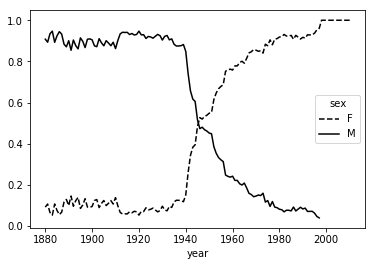

In [34]:
table.plot(style={'M': 'k-', 'F': 'k--'})